In [ ]:
Credit : Jeremy Chen

Source : doesn't exist anymore :(

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

# Let's Make Some Data Frames

In [2]:
# DataFrame from list of row (dictionaries)
df = DataFrame([ 
                {'int_col' : np.random.binomial(20,0.5), 'list_col' : np.random.normal(0,1,(2)) }, 
                {'int_col' : 2, 'list_col' : np.random.normal(0,1,(3)) }, \
                {'int_col' : np.random.binomial(20,0.5) }, 
                {'int_col' : 4, 'list_col' : np.random.normal(0,1,(2)) }, 
                {'int_col' : np.random.binomial(20,0.5), 'list_col' : np.random.normal(0,1,(3)) }
                ])
df

,int_col,list_col
0,8,"[-0.6888508028, -0.389340621085]"
1,2,"[0.432146743894, 0.589708650022, 0.296884711575]"
2,12,NaN
3,4,"[0.570945634048, 0.0885092843012]"
4,9,"[0.264123033823, -1.4520969971, -0.439393746037]"


In [3]:
# DataFrame from dictionary of columns (lists)
df = DataFrame({'int_col' : [1,2,6,8,-1], \
                'float_col' : [0.1, 0.2,0.2,9.5,np.NaN], \
                'str_col' : ['a','bb',None,'ccc','a'], \
                'group' : ['Red', 'Red', 'Green', 'Green', 'Red'] })
df

,float_col,group,int_col,str_col
0,0.1,Red,1,a
1,0.2,Red,2,bb
2,0.2,Green,6,None
3,9.5,Green,8,ccc
4,NaN,Red,-1,a


In [6]:
df[:3]

,float_col,group,int_col,str_col
0,0.1,Red,1,a
1,0.2,Red,2,bb
2,0.2,Green,6,None


In [7]:
df[-3:]

,float_col,group,int_col,str_col
2,0.2,Green,6,None
3,9.5,Green,8,ccc
4,NaN,Red,-1,a


In [8]:
df.head() # This DataFrame is not long enough... Shows "head".

,float_col,group,int_col,str_col
0,0.1,Red,1,a
1,0.2,Red,2,bb
2,0.2,Green,6,None
3,9.5,Green,8,ccc
4,NaN,Red,-1,a


In [9]:
df.tail() # This DataFrame is not long enough... Shows "tail".

,float_col,group,int_col,str_col
0,0.1,Red,1,a
1,0.2,Red,2,bb
2,0.2,Green,6,None
3,9.5,Green,8,ccc
4,NaN,Red,-1,a


# Some Important Properties and Operations

### Indexes

In [10]:
# Get index
df.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [11]:
# Get columns
df.columns

Index(['float_col', 'group', 'int_col', 'str_col'], dtype='object')

In [12]:
# Transpose
df.T

,0,1,2,3,4
float_col,0.1,0.2,0.2,9.5,NaN
group,Red,Red,Green,Green,Red
int_col,1,2,6,8,-1
str_col,a,bb,None,ccc,a


In [13]:
df.T.index

Index(['float_col', 'group', 'int_col', 'str_col'], dtype='object')

In [14]:
df.T.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

### Sorting and Ranking

In [16]:
df.sort_values(by='group')

,float_col,group,int_col,str_col
2,0.2,Green,6,None
3,9.5,Green,8,ccc
0,0.1,Red,1,a
1,0.2,Red,2,bb
4,NaN,Red,-1,a


In [17]:
df # Opps... a new DataFrame was returned

,float_col,group,int_col,str_col
0,0.1,Red,1,a
1,0.2,Red,2,bb
2,0.2,Green,6,None
3,9.5,Green,8,ccc
4,NaN,Red,-1,a


In [18]:
df.sort_index(ascending=False) # Sort by group then do it again by index (a little pointless)

,float_col,group,int_col,str_col
4,NaN,Red,-1,a
3,9.5,Green,8,ccc
2,0.2,Green,6,None
1,0.2,Red,2,bb
0,0.1,Red,1,a


In [19]:
df.sort_index(axis=1, ascending=False) # Sort columns (axis=1; axis=0 for rows)...

,str_col,int_col,group,float_col
0,a,1,Red,0.1
1,bb,2,Red,0.2
2,None,6,Green,0.2
3,ccc,8,Green,9.5
4,a,-1,Red,NaN


In [20]:
# Where there is sorting, there is ranking...
df['int_col'].rank()

0    2
1    3
2    4
3    5
4    1
Name: int_col, dtype: float64

In [21]:
df.rank()

,float_col,group,int_col,str_col
0,1.0,4.0,2,1.5
1,2.5,4.0,3,3.0
2,2.5,1.5,4,NaN
3,4.0,1.5,5,4.0
4,NaN,4.0,1,1.5


In [22]:
df.rank(method='average'), df.rank(method='min'), df.rank(method='max')

(   float_col  group  int_col  str_col
 0        1.0    4.0        2      1.5
 1        2.5    4.0        3      3.0
 2        2.5    1.5        4      NaN
 3        4.0    1.5        5      4.0
 4        NaN    4.0        1      1.5,    float_col  group  int_col  str_col
 0          1      3        2        1
 1          2      3        3        3
 2          2      1        4      NaN
 3          4      1        5        4
 4        NaN      3        1        1,    float_col  group  int_col  str_col
 0          1      5        2        2
 1          3      5        3        3
 2          3      2        4      NaN
 3          4      2        5        4
 4        NaN      5        1        2)

In [23]:
df.rank(method='first') # ValueError: first not supported for non-numeric data

ValueError: first not supported for non-numeric data

In [24]:
df['float_col'].rank(method='first')

0     1
1     2
2     3
3     4
4   NaN
Name: float_col, dtype: float64

In [25]:
df.rank(axis=1)

,float_col,int_col
0,1,2
1,1,2
2,1,2
3,2,1
4,NaN,1


# Indexing

#### Selecting a Column

In [26]:
df['float_col']

0    0.1
1    0.2
2    0.2
3    9.5
4    NaN
Name: float_col, dtype: float64

In [27]:
df.float_col

0    0.1
1    0.2
2    0.2
3    9.5
4    NaN
Name: float_col, dtype: float64

### Selecting a Subset of Columns

In [6]:
# Selecting a subset of columns (a dataframe)
df[['float_col','int_col']]

,float_col,int_col
0,0.1,1
1,0.2,2
2,0.2,6
3,9.5,8
4,NaN,-1


In [7]:
tmpDF = df[['float_col','int_col']]
type(tmpDF)

pandas.core.frame.DataFrame

In [8]:
# Selecting a column (a Series)
df['int_col']

0    1
1    2
2    6
3    8
4   -1
Name: int_col, dtype: int64

In [9]:
tmpSeries = df['int_col'] # This is a Series
type(tmpSeries)

pandas.core.series.Series

In [10]:
tmpDF = df[['int_col']] # This is a DataFrame
type(tmpDF)

pandas.core.frame.DataFrame

### Getting (and Setting) Entries

In [11]:
df.ix[1, 'int_col']

2

In [12]:
df.ix[1, 'int_col'] = 9

In [13]:
df.ix[1, 'int_col'] # !?

9

In [14]:
df.ix[1, 'int_col']

9

In [15]:
df.ix[1, 'int_col'] += 1
(df.ix[1]['int_col'], df.ix[1, 'int_col'])

(10, 10)

In [16]:
df.ix[1, 'int_col'] += 1
(df.ix[1]['int_col'], df.ix[1, 'int_col'])

(11, 11)

In [17]:
# Oh... df.ix[1] is a copied series
df.ix[1]

float_col    0.2
group        Red
int_col       11
str_col       bb
Name: 1, dtype: object

In [18]:
df.at[1, 'int_col'] += 2 # Works too, and is faster for scalar access
df.at[1, 'int_col']

13

In [19]:
df.ix[[1,3], ['int_col', 'float_col']] # Getting Blocks

,int_col,float_col
1,13,0.2
3,8,9.5


In [20]:
df.ix[[1,3], ['str_col', 'float_col']] = 1.85 # Setting Blocks
df

,float_col,group,int_col,str_col
0,0.10,Red,1,a
1,1.85,Red,13,1.85
2,0.20,Green,6,None
3,1.85,Green,8,1.85
4,NaN,Red,-1,a


In [21]:
df.ix[[1,3], ['str_col']] = 'bb' # Getting Blocks
df

,float_col,group,int_col,str_col
0,0.10,Red,1,a
1,1.85,Red,13,bb
2,0.20,Green,6,None
3,1.85,Green,8,bb
4,NaN,Red,-1,a


### Boolean Indexing (SELECT WHERE)

In [22]:
df[(df['float_col'] > 0.1) & (df['int_col']>2)]

,float_col,group,int_col,str_col
1,1.85,Red,13,bb
2,0.20,Green,6,None
3,1.85,Green,8,bb


In [23]:
df[(df['float_col'] > 0.1) | (df['int_col']>2)]

,float_col,group,int_col,str_col
1,1.85,Red,13,bb
2,0.20,Green,6,None
3,1.85,Green,8,bb


In [24]:
df[~(df['float_col'] > 0.1)]

,float_col,group,int_col,str_col
0,0.1,Red,1,a
4,NaN,Red,-1,a


# Indexes

In [17]:
df1 = df.copy()
df1['myIndex'] = ['one', 'two', 'three', 'four', 42] # Make sure this is of the same length as existing index
df1

,float_col,group,int_col,str_col,myIndex
0,0.1,Red,1,a,one
1,0.2,Red,2,bb,two
2,0.2,Green,6,None,three
3,9.5,Green,8,ccc,four
4,NaN,Red,-1,a,42


In [18]:
df1.set_index(['myIndex']) # Returns a new DataFrame unless inplace=True

,float_col,group,int_col,str_col
myIndex,,,,
one,0.1,Red,1,a
two,0.2,Red,2,bb
three,0.2,Green,6,None
four,9.5,Green,8,ccc
42,NaN,Red,-1,a


In [19]:
df1

,float_col,group,int_col,str_col,myIndex
0,0.1,Red,1,a,one
1,0.2,Red,2,bb,two
2,0.2,Green,6,None,three
3,9.5,Green,8,ccc,four
4,NaN,Red,-1,a,42


In [20]:
df1.set_index(['myIndex'], inplace=True)
df1

,float_col,group,int_col,str_col
myIndex,,,,
one,0.1,Red,1,a
two,0.2,Red,2,bb
three,0.2,Green,6,None
four,9.5,Green,8,ccc
42,NaN,Red,-1,a


In [21]:
df1.ix[['one','three']]

,float_col,group,int_col,str_col
myIndex,,,,
one,0.1,Red,1,a
three,0.2,Green,6,None


In [22]:
df1['one':'three'] # What sorcery is this!? (Endpoints inclusive, btw.)

,float_col,group,int_col,str_col
myIndex,,,,
one,0.1,Red,1,a
two,0.2,Red,2,bb
three,0.2,Green,6,None


In [30]:
df1.group['two'] # Can't do df1.group.two (df1.group is a Series)

myIndex
one        Red
two        Red
three    Green
four     Green
42         Red
Name: group, dtype: object

In [62]:
df1.group.two # Can't do this (df1.group is a Series)

AttributeError: 'Series' object has no attribute 'two'

### Stacking, Unstacking and Index Reorganization

In [63]:
df1

,float_col,group,int_col,str_col
myIndex,,,,
one,0.10,Red,1,a
two,1.85,Red,11,1.85
three,0.20,Green,6,None
four,1.85,Green,8,1.85
42,NaN,Red,-1,a


In [32]:
dfStack = df1.stack()
dfStack

myIndex           
one      float_col      0.1
         group          Red
         int_col          1
         str_col          a
two      float_col     1.85
         group          Red
         int_col         13
         str_col         bb
three    float_col      0.2
         group        Green
         int_col          6
four     float_col     1.85
         group        Green
         int_col          8
         str_col         bb
42       group          Red
         int_col         -1
         str_col          a
dtype: object

In [33]:
type(dfStack['one']) # Converts a DataFrame with a single index into a series of series

pandas.core.series.Series

In [34]:
dfStack[0:5] # What is this??? (Are you as confused as I am? I guess this is probably pointless.)

myIndex           
one      float_col     0.1
         group         Red
         int_col         1
         str_col         a
two      float_col    1.85
dtype: object

In [23]:
df1 = df.copy()
df1['myIndex'] = ['one', 'two', 'three', 'four', 42] # Make sure this is of the same length as existing index
df1.set_index(['group', 'myIndex'], inplace=True)
df1

float_col  int_col str_col
group myIndex                            
Red   one            0.1        1       a
      two            0.2        2      bb
Green three          0.2        6    None
      four           9.5        8     ccc
Red   42             NaN       -1       a

In [70]:
df1.ix[['Red','one']:['Green','three']] # Doesn't work... But why would you want to do this?

KeyError: 'MultiIndex lexsort depth 0, key was length 1'

In [24]:
dfStack = df1.stack()
dfStack

group  myIndex           
Red    one      float_col    0.1
                int_col        1
                str_col        a
       two      float_col    0.2
                int_col        2
                str_col       bb
Green  three    float_col    0.2
                int_col        6
       four     float_col    9.5
                int_col        8
                str_col      ccc
Red    42       int_col       -1
                str_col        a
dtype: object

In [72]:
dfStack[0:5] # Again... (Note again, this is probably pointless.)

group  myIndex           
Red    one      float_col     0.1
                int_col         1
                str_col         a
       two      float_col    1.85
                int_col        11
dtype: object

In [25]:
dfStack['Red']

myIndex           
one      float_col    0.1
         int_col        1
         str_col        a
two      float_col    0.2
         int_col        2
         str_col       bb
42       int_col       -1
         str_col        a
dtype: object

In [26]:
type(dfStack)

pandas.core.series.Series

In [27]:
dfStack[['Red', 'two']] # Fail

group  myIndex           
Red    one      float_col    0.1
                int_col        1
                str_col        a
       two      float_col    0.2
                int_col        2
                str_col       bb
       42       int_col       -1
                str_col        a
dtype: object

In [75]:
dfStack['Red']['two']

float_col    1.85
int_col        11
str_col      1.85
dtype: object

In [76]:
dfStack

group  myIndex           
Red    one      float_col     0.1
                int_col         1
                str_col         a
       two      float_col    1.85
                int_col        11
                str_col      1.85
Green  three    float_col     0.2
                int_col         6
       four     float_col    1.85
                int_col         8
                str_col      1.85
Red    42       int_col        -1
                str_col         a
dtype: object

In [77]:
dfStack.unstack()

float_col int_col str_col
group myIndex                          
Green four         1.85       8    1.85
      three         0.2       6     NaN
Red   42            NaN      -1       a
      one           0.1       1       a
      two          1.85      11    1.85

In [79]:
dfStack.unstack(0) # Convert stack to DataFrame with columns corresponding to "the level 0 index"

group             Green   Red
myIndex                      
42      int_col     NaN    -1
        str_col     NaN     a
four    float_col  1.85   NaN
        int_col       8   NaN
        str_col    1.85   NaN
one     float_col   NaN   0.1
        int_col     NaN     1
        str_col     NaN     a
three   float_col   0.2   NaN
        int_col       6   NaN
two     float_col   NaN  1.85
        int_col     NaN    11
        str_col     NaN  1.85

In [80]:
dfStack.unstack(1) # Convert stack to DataFrame with columns corresponding to "the level 1 index"

myIndex           42  four  one three   two
group                                      
Green float_col  NaN  1.85  NaN   0.2   NaN
      int_col    NaN     8  NaN     6   NaN
      str_col    NaN  1.85  NaN   NaN   NaN
Red   float_col  NaN   NaN  0.1   NaN  1.85
      int_col     -1   NaN    1   NaN    11
      str_col      a   NaN    a   NaN  1.85

In [81]:
dfStack.unstack(2) # Convert stack to DataFrame with columns corresponding to "the level 2 index"

float_col int_col str_col
group myIndex                          
Green four         1.85       8    1.85
      three         0.2       6     NaN
Red   42            NaN      -1       a
      one           0.1       1       a
      two          1.85      11    1.85

In [82]:
dfUnstacked = dfStack.unstack(2).unstack(0)
# Note that 'float_col', 'int_col', and 'str_col' were unstacked first then 'Green' and 'Red'
dfUnstacked

float_col       int_col      str_col      
group       Green   Red   Green  Red   Green   Red
myIndex                                           
42            NaN   NaN     NaN   -1     NaN     a
four         1.85   NaN       8  NaN    1.85   NaN
one           NaN   0.1     NaN    1     NaN     a
three         0.2   NaN       6  NaN     NaN   NaN
two           NaN  1.85     NaN   11     NaN  1.85

In [83]:
dfUnstacked['float_col']

group,Green,Red
myIndex,,
42,NaN,NaN
four,1.85,NaN
one,NaN,0.1
three,0.2,NaN
two,NaN,1.85


In [84]:
dfUnstacked['Green'] # Have to do it outside in...

KeyError: 'Green'

In [85]:
dfUnstacked = dfStack.unstack(0).unstack()
# This time 'Green' and 'Red' were unstacked first, then 'float_col', 'int_col', and 'str_col'
dfUnstacked

group       Green                       Red                
        float_col int_col str_col float_col int_col str_col
myIndex                                                    
42            NaN     NaN     NaN       NaN      -1       a
four         1.85       8    1.85       NaN     NaN     NaN
one           NaN     NaN     NaN       0.1       1       a
three         0.2       6     NaN       NaN     NaN     NaN
two           NaN     NaN     NaN      1.85      11    1.85

In [86]:
dfUnstacked['Green'] # Yes, do it outside in...

,float_col,int_col,str_col
myIndex,,,
42,NaN,NaN,NaN
four,1.85,8,1.85
one,NaN,NaN,NaN
three,0.2,6,NaN
two,NaN,NaN,NaN


# Renaming

For a less silly example, see: 1.USA.gov Data Download example.

In [87]:
df2 = df.rename(columns={'int_col' : 'some_other_name'})

In [88]:
df # No change here

,float_col,group,int_col,str_col
0,0.10,Red,1,a
1,1.85,Red,11,1.85
2,0.20,Green,6,None
3,1.85,Green,8,1.85
4,NaN,Red,-1,a


In [89]:
df2 # Rename creates a new DataFrame

,float_col,group,some_other_name,str_col
0,0.10,Red,1,a
1,1.85,Red,11,1.85
2,0.20,Green,6,None
3,1.85,Green,8,1.85
4,NaN,Red,-1,a


In [90]:
df2.rename(columns={'some_other_name' : 'int_col2'}, inplace = True)
df2 # ... unless the rename is done "in place"

,float_col,group,int_col2,str_col
0,0.10,Red,1,a
1,1.85,Red,11,1.85
2,0.20,Green,6,None
3,1.85,Green,8,1.85
4,NaN,Red,-1,a


# Handling missing values

### Drop missing values

In [92]:
df2

,float_col,group,int_col2,str_col
0,0.10,Red,1,a
1,1.85,Red,11,1.85
2,0.20,Green,6,None
3,1.85,Green,8,1.85
4,NaN,Red,-1,a


In [93]:
df3 = df2.dropna()
df3

,float_col,group,int_col2,str_col
0,0.10,Red,1,a
1,1.85,Red,11,1.85
3,1.85,Green,8,1.85


In [94]:
df2 # dropna is not in place

,float_col,group,int_col2,str_col
0,0.10,Red,1,a
1,1.85,Red,11,1.85
2,0.20,Green,6,None
3,1.85,Green,8,1.85
4,NaN,Red,-1,a


In [95]:
df2.dropna(how = 'all') # Drop if whole row is NA

,float_col,group,int_col2,str_col
0,0.10,Red,1,a
1,1.85,Red,11,1.85
2,0.20,Green,6,None
3,1.85,Green,8,1.85
4,NaN,Red,-1,a


In [96]:
df2.dropna(how = 'any') # Like just now

,float_col,group,int_col2,str_col
0,0.10,Red,1,a
1,1.85,Red,11,1.85
3,1.85,Green,8,1.85


In [97]:
df2.dropna(axis=1) # Drop columns with an NA value somewhere; not so useful =P

,group,int_col2
0,Red,1
1,Red,11
2,Green,6
3,Green,8
4,Red,-1


In [98]:
df2.dropna(subset=['float_col', 'int_col2']) # Drop rows if NAs appear in any of the stated columns

,float_col,group,int_col2,str_col
0,0.10,Red,1,a
1,1.85,Red,11,1.85
2,0.20,Green,6,None
3,1.85,Green,8,1.85


### Fill missing values

In [99]:
df3 = df.copy()
df3

,float_col,group,int_col,str_col
0,0.10,Red,1,a
1,1.85,Red,11,1.85
2,0.20,Green,6,None
3,1.85,Green,8,1.85
4,NaN,Red,-1,a


In [100]:
mean = df3['float_col'].mean() # Calculated over non-NA values
mean

1.0

In [102]:
df3['float_col'].fillna(99)

0     0.10
1     1.85
2     0.20
3     1.85
4    99.00
Name: float_col, dtype: float64

In [103]:
df3 # No change here...

,float_col,group,int_col,str_col
0,0.10,Red,1,a
1,1.85,Red,11,1.85
2,0.20,Green,6,None
3,1.85,Green,8,1.85
4,NaN,Red,-1,a


In [104]:
df3['float_col'].fillna(mean, inplace = True)
df3

,float_col,group,int_col,str_col
0,0.10,Red,1,a
1,1.85,Red,11,1.85
2,0.20,Green,6,None
3,1.85,Green,8,1.85
4,1.00,Red,-1,a


In [105]:
df3['str_col'].fillna("Zzzzzzzzzz")

0             a
1          1.85
2    Zzzzzzzzzz
3          1.85
4             a
Name: str_col, dtype: object

# map(), apply(), applymap()

### map(): Functions on elements (of a Series)

In [113]:
# The map operation operates over each element of a Series.
df['str_col'].fillna('Zzzzzz').map(lambda x : 'Length of {0} is {1}'.format(x, type(x)) ) # len(None) gives errors.

0         Length of a is <type 'str'>
1    Length of 1.85 is <type 'float'>
2    Length of Zzzzzz is <type 'str'>
3    Length of 1.85 is <type 'float'>
4         Length of a is <type 'str'>
Name: str_col, dtype: object

In [114]:
df[['str_col']].fillna('Zzzzzz').map(lambda x : 'Length of {0} is {1}'.format(x, type(x)) ) # It's for series

AttributeError: 'DataFrame' object has no attribute 'map'

### apply(): Functions on Series

In [115]:
df[['int_col', 'float_col']].apply(np.sum) # Passes in columns (axis = 0)

int_col      25
float_col     4
dtype: float64

In [116]:
df[['int_col', 'float_col']].apply(np.sqrt) # Passes in columns (axis = 0)

,int_col,float_col
0,1.000000,0.316228
1,3.316625,1.360147
2,2.449490,0.447214
3,2.828427,1.360147
4,NaN,NaN


In [117]:
# This passes in rows (axis = 1)
df.apply(lambda row: "{0}: {1} and {2}".format(row['str_col'], row['int_col'], row['float_col']), axis = 1)

0         a: 1 and 0.1
1    1.85: 11 and 1.85
2      None: 6 and 0.2
3     1.85: 8 and 1.85
4        a: -1 and nan
dtype: object

### applymap(): Functions on elements of a DataFrame (But usually a Column)

In [118]:
df.applymap(lambda x: type(x))

,float_col,group,int_col,str_col
0,<type 'numpy.float64'>,<type 'str'>,<type 'numpy.int64'>,<type 'str'>
1,<type 'numpy.float64'>,<type 'str'>,<type 'numpy.int64'>,<type 'float'>
2,<type 'numpy.float64'>,<type 'str'>,<type 'numpy.int64'>,<type 'NoneType'>
3,<type 'numpy.float64'>,<type 'str'>,<type 'numpy.int64'>,<type 'float'>
4,<type 'numpy.float64'>,<type 'str'>,<type 'numpy.int64'>,<type 'str'>


In [119]:
import sys
df.applymap(lambda x: sys.getsizeof(x))

,float_col,group,int_col,str_col
0,16,24,16,22
1,16,24,16,16
2,16,26,16,8
3,16,26,16,16
4,16,24,16,22


# groupby(): Aggregation

### Basic Training

In [120]:
# Grouping elements of a Series
grouped = df['float_col'].groupby(df['group'])
grouped # Yucks!

In [122]:
grouped.mean()

group
Green    1.025
Red      0.975
dtype: float64

In [123]:
# Grouping elements of a DataFrame
grouped = df[['int_col', 'float_col']].groupby(df['group'])
grouped

In [124]:
grouped.std()

,int_col,float_col
group,,
Green,1.414214,1.166726
Red,6.429101,1.237437


In [125]:
grouped.agg(['mean','std', lambda seq: sum(map(lambda x: x if x > 1 else 0, seq)) ])

int_col                      float_col                    
           mean       std  <lambda>       mean       std  <lambda>
group                                                             
Green  7.000000  1.414214        14      1.025  1.166726      1.85
Red    3.666667  6.429101        11      0.975  1.237437      1.85

### Intermediate Training: dict / series / function Groups

In [29]:
dfGroupies = DataFrame(np.random.rand(6, 4),
                       columns=['Justin Bieber', 'Kayne West', 'Timber', 'Pharrell Williams'],
                       index=['Madison', 'Ashley', 'Zoe', 'Chloe', 'Riley', 'Prudence']
                       )
wwC = r"I got that off-black Cadillac, midnight drive; Got that gas pedal, leaned back, taking my time; I’m rollin' out, roof off, letting in sky; I shine, the city never looked so bright".split('; ')
wwFn = lambda seq : wwC[int(sum(seq)*1000) % len(wwC)]; wwFn.func_name = 'WW'
dfGroupies

,Justin Bieber,Kayne West,Timber,Pharrell Williams
Madison,0.988235,0.183723,0.191343,0.117947
Ashley,0.936945,0.230509,0.559091,0.956306
Zoe,0.202454,0.075604,0.133405,0.644307
Chloe,0.503277,0.043384,0.217463,0.874210
Riley,0.738604,0.881630,0.127277,0.090009
Prudence,0.817338,0.559425,0.790462,0.450914


In [127]:
# Groups via a dict
groupieGroups = dfGroupies.groupby({'Justin Bieber':'DB', 'Kayne West':'DB', 'Timber':'R&B', 'Pharrell Williams':'R&B'}, axis=1)
groupieGroups.agg([np.sum, wwFn], axis=1)

# Apparently, multiple function application does not work if the aggregation axis is not 0
#   1767         if self.axis != 0:
#-> 1768             raise NotImplementedError

NotImplementedError: 

In [130]:
groupieGroups = dfGroupies.T.groupby({'Justin Bieber':'DB', 'Kayne West':'DB', 'Timber':'R&B', 'Pharrell Williams':'R&B'}, axis=0)
groupieGroups.agg([np.sum, wwFn]).T # Note the transposes

DB                                            R&B
Madison  sum                                         1.033591                                       1.490669
         WW   Got that gas pedal, leaned back, taking my time      I’m rollin' out, roof off, letting in sky
Ashley   sum                                        0.7312087                                       0.139502
         WW          I shine, the city never looked so bright       I shine, the city never looked so bright
Zoe      sum                                         1.450482                                       1.231027
         WW         I’m rollin' out, roof off, letting in sky       I shine, the city never looked so bright
Chloe    sum                                        0.9498591                                       0.926957
         WW   Got that gas pedal, leaned back, taking my time      I’m rollin' out, roof off, letting in sky
Riley    sum                                         1.480733                                       0.758325
         WW     I got that off-black Cadillac, midnight drive      I’m rollin' out, roof off, letting in sky
Prudence sum                                        0.7288672                                       0.976094
         WW     I got that off-black Cadillac, midnight drive  I got that off-black Cadillac, midnight drive

In [131]:
# Groups via a series
groupieGroups = dfGroupies.T.groupby(pd.Series({'Justin Bieber':'DB', 'Kayne West':'DB', 'Timber':'R&B', 'Pharrell Williams':'R&B'}), axis=0)
groupieGroups.agg([np.sum, wwFn], axis = 0).T # Same issue as above

DB                                            R&B
Madison  sum                                         1.033591                                       1.490669
         WW   Got that gas pedal, leaned back, taking my time      I’m rollin' out, roof off, letting in sky
Ashley   sum                                        0.7312087                                       0.139502
         WW          I shine, the city never looked so bright       I shine, the city never looked so bright
Zoe      sum                                         1.450482                                       1.231027
         WW         I’m rollin' out, roof off, letting in sky       I shine, the city never looked so bright
Chloe    sum                                        0.9498591                                       0.926957
         WW   Got that gas pedal, leaned back, taking my time      I’m rollin' out, roof off, letting in sky
Riley    sum                                         1.480733                                       0.758325
         WW     I got that off-black Cadillac, midnight drive      I’m rollin' out, roof off, letting in sky
Prudence sum                                        0.7288672                                       0.976094
         WW     I got that off-black Cadillac, midnight drive  I got that off-black Cadillac, midnight drive

In [132]:
# Groups via Functions
gFn = lambda x: 'DB' if x[0]<'L' else 'R&B'
groupieGroups = dfGroupies.T.groupby(gFn, axis=0)
groupieGroups.agg([np.sum, wwFn], axis=0).T # Same issue as above

DB                                            R&B
Madison  sum                                         1.033591                                       1.490669
         WW   Got that gas pedal, leaned back, taking my time      I’m rollin' out, roof off, letting in sky
Ashley   sum                                        0.7312087                                       0.139502
         WW          I shine, the city never looked so bright       I shine, the city never looked so bright
Zoe      sum                                         1.450482                                       1.231027
         WW         I’m rollin' out, roof off, letting in sky       I shine, the city never looked so bright
Chloe    sum                                        0.9498591                                       0.926957
         WW   Got that gas pedal, leaned back, taking my time      I’m rollin' out, roof off, letting in sky
Riley    sum                                         1.480733                                       0.758325
         WW     I got that off-black Cadillac, midnight drive      I’m rollin' out, roof off, letting in sky
Prudence sum                                        0.7288672                                       0.976094
         WW     I got that off-black Cadillac, midnight drive  I got that off-black Cadillac, midnight drive

### "Group Apply": Multicolumn Functions in Groups

##### A Simple Weighted Average

In [133]:
dfReadings = DataFrame({'category': ['G1']*3 + ['G2']*3 + ['G1']*2 + ['G2']*2,
                        'data': np.random.randn(10),
                        'weights': np.random.rand(10)})
wtMeanDF = lambda df : np.average(df['data'], weights=df['weights'])
dfReadings

,category,data,weights
0,G1,0.816024,0.989102
1,G1,-0.643835,0.112359
2,G1,0.439370,0.143807
3,G2,-0.208202,0.371729
4,G2,-0.877284,0.425562
5,G2,-1.135883,0.359169
6,G1,-0.441136,0.897092
7,G1,-2.262061,0.379309
8,G2,0.202547,0.062038
9,G2,-0.059073,0.732414


In [134]:
dfReadings.groupby('category').apply(wtMeanDF)

category
G1         -0.180747
G2         -0.455893
dtype: float64

##### Linear Regression on Groups

In [135]:
stock_ticker_list = ['AAPL', 'COST', 'SPLS', 'GPS', 'IBM', 'AMGN', 'BRK.B']
some_stock_data = {}
for ticker in ['^GSPC']+stock_ticker_list: # Stuff I can see now: Why do I have "assorted rubber bands (gomitas surtidos)" from SPLS??
    some_stock_data[ticker] = pd.read_csv('S&P500\\S&P500_Data_%s.csv' % ticker, index_col=0, parse_dates=True)
stock_prices = DataFrame({tic: data['Adj Close']
                   for tic, data in some_stock_data.iteritems()})
stocks_gropuped_by_year = stock_prices.ix[datetime.date(2001,1,1):datetime.date(2013,12,31)].groupby(lambda x: x.year)
stocks_gropuped_by_year.count()

,AAPL,AMGN,BRK.B,COST,GPS,IBM,SPLS,^GSPC
2001,248,248,248,248,248,248,248,248
2002,252,252,252,252,252,252,251,252
2003,252,252,252,252,252,252,252,252
2004,252,252,252,252,252,252,252,252
2005,252,252,252,252,252,252,252,252
2006,251,251,251,251,251,251,251,251
2007,251,251,251,251,251,251,251,251
2008,253,253,253,253,253,253,253,253
2009,252,252,252,252,252,252,252,252
2010,252,252,252,252,252,252,252,252


In [136]:
stock_prices.ffill(inplace=True)
stock_prices.bfill(inplace=True)

In [137]:
stocks_gropuped_by_year.count()

,AAPL,AMGN,BRK.B,COST,GPS,IBM,SPLS,^GSPC
2001,248,248,248,248,248,248,248,248
2002,252,252,252,252,252,252,252,252
2003,252,252,252,252,252,252,252,252
2004,252,252,252,252,252,252,252,252
2005,252,252,252,252,252,252,252,252
2006,251,251,251,251,251,251,251,251
2007,251,251,251,251,251,251,251,251
2008,253,253,253,253,253,253,253,253
2009,252,252,252,252,252,252,252,252
2010,252,252,252,252,252,252,252,252


In [138]:
# Correlation with S&P500
gspc_corr = lambda x: x.corrwith(x['^GSPC'])
stocks_gropuped_by_year.apply(gspc_corr)

,AAPL,AMGN,BRK.B,COST,GPS,IBM,SPLS,^GSPC
2001,0.393230,0.592460,-0.152291,0.427374,0.844933,0.312341,0.076358,1
2002,0.945934,0.732072,0.298002,0.875640,0.530216,0.840643,0.762041,1
2003,0.882700,0.581888,0.916359,0.634316,0.927290,0.842941,0.868161,1
2004,0.638094,0.609980,-0.044215,0.549656,0.120240,0.784015,0.568585,1
2005,0.743265,0.754484,0.183083,0.500665,-0.430450,0.124470,0.807563,1
2006,0.838226,0.260556,0.875795,0.060913,0.833992,0.949364,0.725999,1
2007,0.483095,-0.317536,0.171108,0.357574,0.083473,0.674539,-0.315136,1
2008,0.829410,-0.543443,0.802490,0.879629,0.888149,0.824474,0.838396,1
2009,0.952896,0.575831,0.894488,0.925054,0.952086,0.944735,0.931335,1
2010,0.617888,0.453919,0.368787,0.821140,0.522107,0.782999,0.367165,1


In [139]:
# Linear Regression Simple Version

import statsmodels.api as sm
def linreg(df, yvar, xvars):
    Y = df[yvar]
    X = df[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

stocks_gropuped_by_year.apply(linreg, '^GSPC', stock_ticker_list)

,AAPL,COST,SPLS,GPS,IBM,AMGN,BRK.B,intercept
2001,-7.113784,4.075206,24.911547,12.322108,0.273146,3.087762,1.068989,417.024316
2002,18.226878,6.691863,17.903775,-0.048720,2.527420,0.615444,1.718474,149.150079
2003,14.787312,1.355782,-0.874019,10.579500,3.486531,0.970614,5.659728,62.245463
2004,1.301335,-0.670930,10.976931,4.150836,3.706253,2.374479,2.087117,338.049663
2005,1.678864,-1.856986,15.276463,7.843098,0.259193,1.084332,-0.277721,713.028616
2006,1.530741,-0.848646,9.618957,3.482137,2.609406,-0.294227,2.997083,628.327932
2007,1.940077,-4.645959,13.301635,8.355223,3.720405,0.689895,-4.222925,999.392678
2008,2.720482,-3.913315,10.457686,22.407705,0.557759,-4.228364,5.936557,191.087517
2009,0.559075,4.108979,9.746394,3.327866,0.967153,3.199484,3.673072,-34.111982
2010,0.147600,2.130864,2.290478,8.346748,4.292317,6.176385,0.347496,-101.086855


In [140]:
# Linear Regression Fun Version

import statsmodels.api as sm
def linreg(df, yvar, xvars):
    Y = df[yvar]
    X = df[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return pd.DataFrame({ 'Coeffs': result.params, 'p-values': result.pvalues })

LR = stocks_gropuped_by_year.apply(linreg, '^GSPC', stock_ticker_list)
LR[:24]

Coeffs      p-values
2001 AAPL        -7.113784  2.660620e-02
     COST         4.075206  8.528365e-05
     SPLS        24.911547  7.215682e-09
     GPS         12.322108  5.305803e-53
     IBM          0.273146  5.538955e-01
     AMGN         3.087762  3.173930e-07
     BRK.B        1.068989  4.789842e-01
     intercept  417.024316  1.708504e-08
2002 AAPL        18.226878  2.043610e-20
     COST         6.691863  1.865627e-16
     SPLS        17.903775  5.286304e-16
     GPS         -0.048720  9.776568e-01
     IBM          2.527420  8.246642e-25
     AMGN         0.615444  1.225842e-01
     BRK.B        1.718474  1.903366e-02
     intercept  149.150079  7.348010e-05
2003 AAPL        14.787312  2.474757e-17
     COST         1.355782  4.692480e-02
     SPLS        -0.874019  5.936141e-01
     GPS         10.579500  2.085581e-12
     IBM          3.486531  7.813588e-11
     AMGN         0.970614  2.409013e-03
     BRK.B        5.659728  2.127361e-09
     intercept   62.245463  3.165603e-02

In [141]:
LR.stack().unstack(1).unstack()

AAPL                    COST                     SPLS  \
         Coeffs      p-values    Coeffs      p-values     Coeffs   
2001  -7.113784  2.660620e-02  4.075206  8.528365e-05  24.911547   
2002  18.226878  2.043610e-20  6.691863  1.865627e-16  17.903775   
2003  14.787312  2.474757e-17  1.355782  4.692480e-02  -0.874019   
2004   1.301335  4.122901e-06 -0.670930  2.014807e-01  10.976931   
2005   1.678864  1.643512e-19 -1.856986  3.712925e-02  15.276463   
2006   1.530741  4.555147e-14 -0.848646  1.210896e-01   9.618957   
2007   1.940077  9.299696e-17 -4.645959  7.866242e-05  13.301635   
2008   2.720482  6.025280e-40 -3.913315  8.336770e-04  10.457686   
2009   0.559075  1.238028e-02  4.108979  3.454003e-12   9.746394   
2010   0.147600  1.764131e-01  2.130864  8.850068e-04   2.290478   
2011  -0.849081  6.277554e-09  2.766150  2.453580e-02   1.884526   
2012   0.120139  6.362260e-04  1.370385  2.498082e-04  15.241855   
2013   0.487188  8.907976e-26  6.769512  9.798477e-33   6.541689   

                          GPS                     IBM                    AMGN  \
          p-values     Coeffs      p-values    Coeffs      p-values    Coeffs   
2001  7.215682e-09  12.322108  5.305803e-53  0.273146  5.538955e-01  3.087762   
2002  5.286304e-16  -0.048720  9.776568e-01  2.527420  8.246642e-25  0.615444   
2003  5.936141e-01  10.579500  2.085581e-12  3.486531  7.813588e-11  0.970614   
2004  6.922522e-23   4.150836  3.101741e-14  3.706253  3.313281e-28  2.374479   
2005  6.082728e-14   7.843098  1.469004e-11  0.259193  2.668748e-01  1.084332   
2006  1.751582e-15   3.482137  4.351811e-02  2.609406  1.586081e-06 -0.294227   
2007  2.606458e-08   8.355223  1.393656e-03  3.720405  1.727903e-13  0.689895   
2008  1.421165e-04  22.407705  3.821233e-19  0.557759  1.530472e-01 -4.228364   
2009  1.740047e-09   3.327866  2.629264e-02  0.967153  6.223719e-02  3.199484   
2010  2.064753e-01   8.346748  2.218997e-17  4.292317  2.017333e-16  6.176385   
2011  3.503703e-01   8.388549  4.474798e-04  0.646917  1.883549e-01  1.763027   
2012  8.677440e-29  -0.484236  5.364719e-01  2.294094  3.890246e-18  3.711593   
2013  1.102007e-03  -6.327821  2.618105e-19  1.292201  4.678064e-13  1.088944   

                       BRK.B                 intercept                
          p-values    Coeffs      p-values      Coeffs      p-values  
2001  3.173930e-07  1.068989  4.789842e-01  417.024316  1.708504e-08  
2002  1.225842e-01  1.718474  1.903366e-02  149.150079  7.348010e-05  
2003  2.409013e-03  5.659728  2.127361e-09   62.245463  3.165603e-02  
2004  7.270512e-10  2.087117  1.859440e-08  338.049663  1.100075e-25  
2005  7.165491e-07 -0.277721  7.539176e-01  713.028616  2.174339e-51  
2006  4.205149e-01  2.997083  4.539529e-14  628.327932  1.241423e-48  
2007  8.870549e-02 -4.222925  1.109055e-09  999.392678  5.289867e-24  
2008  3.813945e-20  5.936557  4.675414e-26  191.087517  1.629492e-05  
2009  5.167058e-18  3.673072  5.193423e-12  -34.111982  2.727188e-01  
2010  2.798605e-15  0.347496  3.122093e-01 -101.086855  4.939951e-03  
2011  1.216243e-01  5.867324  1.567559e-07  528.145785  9.838666e-11  
2012  1.236646e-09  2.876701  1.782896e-03   66.828690  1.519108e-01  
2013  4.551097e-05  6.684371  5.375649e-22 -280.132203  6.169435e-07

# Calculated Columns: New Columns = f(Existing Columns)

In [142]:
df4 = df.copy()
df4

,float_col,group,int_col,str_col
0,0.10,Red,1,a
1,1.85,Red,11,1.85
2,0.20,Green,6,None
3,1.85,Green,8,1.85
4,NaN,Red,-1,a


### Series/Column to Column: map() and applymap()

In [143]:
df4['Type of str_col'] = df4['str_col'].map(lambda x: type(x))

In [144]:
df4['Size of str_col'] = df4[['str_col']].applymap(lambda x: sys.getsizeof(x))

In [145]:
df4

,float_col,group,int_col,str_col,Type of str_col,Size of str_col
0,0.10,Red,1,a,<type 'str'>,22
1,1.85,Red,11,1.85,<type 'float'>,16
2,0.20,Green,6,None,<type 'NoneType'>,8
3,1.85,Green,8,1.85,<type 'float'>,16
4,NaN,Red,-1,a,<type 'str'>,22


### Column to Column(s): zippy

In [146]:
# Preliminary: zip
zip([1,2,3], ['a', 'b', 'c'], [1.2, 1.4, 1.8])

[(1, 'a', 1.2), (2, 'b', 1.4), (3, 'c', 1.8)]

In [147]:
# Preliminary: *SPLAT*
"{0}|{1}|{2}|{3}".format([1,2,3,4]) # Does not work

IndexError: tuple index out of range

In [148]:
"{0}|{1}|{2}|{3}".format(*[1,2,3,4]) # The splat operator (*) expands a list into a sequence of arguments

'1|2|3|4'

In [149]:
*[1,2,3,4] # ... only for arguments

SyntaxError: invalid syntax (<ipython-input-149-bcd70721281d>, line 1)

In [150]:
df4['int_col'].map(lambda x: (2*x, 3*x))

0      (2, 3)
1    (22, 33)
2    (12, 18)
3    (16, 24)
4    (-2, -3)
Name: int_col, dtype: object

In [151]:
zip(*df4['int_col'].map(lambda x: (2*x, 3*x)))

[(2, 22, 12, 16, -2), (3, 33, 18, 24, -3)]

In [152]:
df4['2x int_col'],df4['3x int_col'] = zip(*df4['int_col'].map(lambda x: (2*x, 3*x)))
df4

,float_col,group,int_col,str_col,Type of str_col,Size of str_col,2x int_col,3x int_col
0,0.10,Red,1,a,<type 'str'>,22,2,3
1,1.85,Red,11,1.85,<type 'float'>,16,22,33
2,0.20,Green,6,None,<type 'NoneType'>,8,12,18
3,1.85,Green,8,1.85,<type 'float'>,16,16,24
4,NaN,Red,-1,a,<type 'str'>,22,-2,-3


In [153]:
# Notice that this works too...
df4['2x int_col (again)'],df4['3x int_col (again)'] = ([2, 4, 12, 16, -2], [3, 6, 18, 24, -3])
df4

,float_col,group,int_col,str_col,Type of str_col,Size of str_col,2x int_col,3x int_col,2x int_col (again),3x int_col (again)
0,0.10,Red,1,a,<type 'str'>,22,2,3,2,3
1,1.85,Red,11,1.85,<type 'float'>,16,22,33,4,6
2,0.20,Green,6,None,<type 'NoneType'>,8,12,18,12,18
3,1.85,Green,8,1.85,<type 'float'>,16,16,24,16,24
4,NaN,Red,-1,a,<type 'str'>,22,-2,-3,-2,-3


### Column(s) to Column: apply() (with axis = 1)

In [154]:
df4 = df.copy()
df4['Something New'] = df.apply(lambda row: "{0}: {1} and {2}".format(row['str_col'], row['int_col'], row['float_col']), axis = 1)
df4

,float_col,group,int_col,str_col,Something New
0,0.10,Red,1,a,a: 1 and 0.1
1,1.85,Red,11,1.85,1.85: 11 and 1.85
2,0.20,Green,6,None,None: 6 and 0.2
3,1.85,Green,8,1.85,1.85: 8 and 1.85
4,NaN,Red,-1,a,a: -1 and nan


### Column(s) to Column(s)

In [155]:
df4 = df.copy()
df4

,float_col,group,int_col,str_col
0,0.10,Red,1,a
1,1.85,Red,11,1.85
2,0.20,Green,6,None
3,1.85,Green,8,1.85
4,NaN,Red,-1,a


In [156]:
dfMoreCols = df4.apply(lambda row: Series({ \
                                           'x' : row['int_col']-row['float_col'], \
                                           'y' : row['int_col']+row['float_col'] \
                                           }), axis = 1)
dfMoreCols

,x,y
0,0.90,1.10
1,9.15,12.85
2,5.80,6.20
3,6.15,9.85
4,NaN,NaN


In [157]:
df4.append(dfMoreCols) # Opps. That's for rows

,float_col,group,int_col,str_col,x,y
0,0.10,Red,1,a,NaN,NaN
1,1.85,Red,11,1.85,NaN,NaN
2,0.20,Green,6,None,NaN,NaN
3,1.85,Green,8,1.85,NaN,NaN
4,NaN,Red,-1,a,NaN,NaN
0,NaN,NaN,NaN,NaN,0.90,1.10
1,NaN,NaN,NaN,NaN,9.15,12.85
2,NaN,NaN,NaN,NaN,5.80,6.20
3,NaN,NaN,NaN,NaN,6.15,9.85
4,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
df4.T.append(dfMoreCols.T).T # Somehow this works (Lame...)

,float_col,group,int_col,str_col,x,y
0,0.1,Red,1,a,0.9,1.1
1,1.85,Red,11,1.85,9.15,12.85
2,0.2,Green,6,None,5.8,6.2
3,1.85,Green,8,1.85,6.15,9.85
4,NaN,Red,-1,a,NaN,NaN


In [159]:
df4['x'],df4['y'] = dfMoreCols
df4 # Eeeeeeks!

,float_col,group,int_col,str_col,x,y
0,0.10,Red,1,a,x,y
1,1.85,Red,11,1.85,x,y
2,0.20,Green,6,None,x,y
3,1.85,Green,8,1.85,x,y
4,NaN,Red,-1,a,x,y


In [160]:
df4['x'],df4['y'] = dfMoreCols['x'],dfMoreCols['y']
df4

,float_col,group,int_col,str_col,x,y
0,0.10,Red,1,a,0.90,1.10
1,1.85,Red,11,1.85,9.15,12.85
2,0.20,Green,6,None,5.80,6.20
3,1.85,Green,8,1.85,6.15,9.85
4,NaN,Red,-1,a,NaN,NaN


In [161]:
for col_name in dfMoreCols.columns:
    df4[col_name] = dfMoreCols[col_name]
df4

,float_col,group,int_col,str_col,x,y
0,0.10,Red,1,a,0.90,1.10
1,1.85,Red,11,1.85,9.15,12.85
2,0.20,Green,6,None,5.80,6.20
3,1.85,Green,8,1.85,6.15,9.85
4,NaN,Red,-1,a,NaN,NaN


# Data From Files

My recommendation: See <a href=http://pandas.pydata.org/pandas-docs/stable/io.html>documentation</a>.

### Loading from Excel

In [162]:
SnP500_tbl = pd.ExcelFile('S&P500\\S&P500_Feb2014.xlsx').parse('S&P500')
SnP500_tbl.head()

,Ticker symbol,Company,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St Paul, Minnesota",NaN
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment & Services,"North Chicago, Illinois",NaN
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31 00:00:00
3,ACE,ACE Limited,reports,Financials,Property & Casualty Insurance,"Zurich, Switzerland",NaN
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Services,"Dublin, Ireland",NaN


Saving to Excel (But why would you do that with Pandas?): See <a href=http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel>documentation</a>. For something that looks a lot better for Excel writes, check out <a href="http://pythonhosted.org/openpyxl/">OpenPyXL</a>.

### Loading CSV

In [163]:
SnP500_Index = pd.read_csv('S&P500\\S&P500_Data_^GSPC.csv', index_col=0, parse_dates=True) # Reading from CSV takes away the index

Saving to CSV: See S&P500 Example or <a href=http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv>documentation</a>. (I just don't want to create another file.)

# Basic Descriptive Statistics

In [164]:
SnP500_Index_2013 = SnP500_Index.ix[datetime.datetime(2013,1,1):datetime.datetime(2013,12,31)]
SnP500_Index_2013.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,1642.298651,1649.615714,1635.740159,1643.798968,3.349864e+09,1643.798968
std,99.472830,99.103795,99.700937,99.235110,5.778670e+08,99.235110
min,1426.190000,1461.890000,1426.190000,1457.150000,0.000000e+00,1457.150000
25%,1560.520000,1564.700000,1551.847500,1561.802500,3.085280e+09,1561.802500
50%,1649.135000,1656.145000,1639.600000,1650.405000,3.331930e+09,1650.405000
75%,1698.480000,1706.250000,1693.155000,1699.462500,3.612322e+09,1699.462500
max,1842.970000,1849.440000,1842.410000,1848.360000,5.797280e+09,1848.360000


In [165]:
df.describe()

,float_col,int_col
count,4.000000,5.000000
mean,1.000000,5.000000
std,0.982344,4.949747
min,0.100000,-1.000000
25%,0.175000,1.000000
50%,1.025000,6.000000
75%,1.850000,8.000000
max,1.850000,11.000000


In [167]:
df

,float_col,group,int_col,str_col
0,0.10,Red,1,a
1,1.85,Red,11,1.85
2,0.20,Green,6,None
3,1.85,Green,8,1.85
4,NaN,Red,-1,a


In [168]:
df['group'].value_counts()

Red      3
Green    2
dtype: int64

In [169]:
df['str_col'].value_counts()

1.85    2
a       2
dtype: int64

In [170]:
df.cov()

,float_col,int_col
float_col,0.965000,3.483333
int_col,3.483333,24.500000


In [171]:
df.corr()

,float_col,int_col
float_col,1.000000,0.843634
int_col,0.843634,1.000000


<h3>Useful Functions</h3>
<table border="1">
<colgroup>
<col width="20%">
<col width="80%">
</colgroup>
<thead valign="bottom">
<tr><th class="head">Function</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr><td><tt><span class="pre">count</span></tt></td>
<td>Number of non-null observations</td>
</tr>
<tr><td><tt><span class="pre">sum</span></tt></td>
<td>Sum of values</td>
</tr>
<tr><td><tt><span class="pre">mean</span></tt></td>
<td>Mean of values</td>
</tr>
<tr><td><tt><span class="pre">mad</span></tt></td>
<td>Mean absolute deviation</td>
</tr>
<tr><td><tt><span class="pre">median</span></tt></td>
<td>Arithmetic median of values</td>
</tr>
<tr><td><tt><span class="pre">min</span></tt></td>
<td>Minimum</td>
</tr>
<tr><td><tt><span class="pre">max</span></tt></td>
<td>Maximum</td>
</tr>
<tr><td><tt><span class="pre">mode</span></tt></td>
<td>Mode</td>
</tr>
<tr><td><tt><span class="pre">abs</span></tt></td>
<td>Absolute Value</td>
</tr>
<tr><td><tt><span class="pre">prod</span></tt></td>
<td>Product of values</td>
</tr>
<tr><td><tt><span class="pre">std</span></tt></td>
<td>Unbiased standard deviation</td>
</tr>
<tr><td><tt><span class="pre">var</span></tt></td>
<td>Unbiased variance</td>
</tr>
<tr><td><tt><span class="pre">skew</span></tt></td>
<td>Unbiased skewness (3rd moment)</td>
</tr>
<tr><td><tt><span class="pre">kurt</span></tt></td>
<td>Unbiased kurtosis (4th moment)</td>
</tr>
<tr><td><tt><span class="pre">quantile</span></tt></td>
<td>Sample quantile (value at %)</td>
</tr>
<tr><td><tt><span class="pre">cumsum</span></tt></td>
<td>Cumulative sum</td>
</tr>
<tr><td><tt><span class="pre">cumprod</span></tt></td>
<td>Cumulative product</td>
</tr>
<tr><td><tt><span class="pre">cummax</span></tt></td>
<td>Cumulative maximum</td>
</tr>
<tr><td><tt><span class="pre">cummin</span></tt></td>
<td>Cumulative minimum</td>
</tr>
</tbody>
</table>

### Doing Things By Level

In [172]:
df1 # Remember this multi-index guy?

float_col  int_col str_col
group myIndex                            
Red   one           0.10        1       a
      two           1.85       11    1.85
Green three         0.20        6    None
      four          1.85        8    1.85
Red   42             NaN       -1       a

In [173]:
df1.mean(level = 'group')

,float_col,int_col
group,,
Green,1.025,7.000000
Red,0.975,3.666667


In [176]:
df1[['float_col', 'int_col']].unstack(0) # What an empty DataFrame

float_col        int_col     
group        Green   Red    Green  Red
myIndex                               
42             NaN   NaN      NaN   -1
four          1.85   NaN        8  NaN
one            NaN  0.10      NaN    1
three         0.20   NaN        6  NaN
two            NaN  1.85      NaN   11

In [177]:
df1[['float_col', 'int_col']].unstack(0).fillna(0.99) # Fill 'er up

float_col        int_col       
group        Green   Red    Green    Red
myIndex                                 
42            0.99  0.99     0.99  -1.00
four          1.85  0.99     8.00   0.99
one           0.99  0.10     0.99   1.00
three         0.20  0.99     6.00   0.99
two           0.99  1.85     0.99  11.00

In [ ]:
df1[['float_col', 'int_col']].unstack(0).fillna(0.99).sum(level='group', axis=1)

# Pivot Tables

In [178]:
dfPT = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3, \
                     'B' : ['A', 'B', 'C'] * 4, \
                     'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2, \
                     'D' : np.random.randn(12), \
                     'E' : np.random.randn(12)})
dfPT

,A,B,C,D,E
0,one,A,foo,-0.107843,2.426957
1,one,B,foo,-1.263446,0.122272
2,two,C,foo,-0.210395,-1.443522
3,three,A,bar,0.396794,0.471695
4,one,B,bar,-1.245678,1.144898
5,one,C,bar,0.294552,-1.468975
6,two,A,foo,-1.496134,0.403120
7,three,B,foo,0.998615,0.411968
8,one,C,foo,0.097325,1.043885
9,one,A,bar,-1.209815,0.070529


In [179]:
pd.pivot_table(dfPT, values='D', rows=['A', 'B'], cols=['C']) # The NaNs come from inexistent values

C             bar       foo
A     B                    
one   A -1.209815 -0.107843
      B -1.245678 -1.263446
      C  0.294552  0.097325
three A  0.396794       NaN
      B       NaN  0.998615
      C -0.980293       NaN
two   A       NaN -1.496134
      B -0.312985       NaN
      C       NaN -0.210395

In [185]:
pd.pivot_table(dfPT, values='D', rows=['A'], cols=['C']) # Aggregation function is "mean" by default (was applied earlier)

C             bar       foo
A     B                    
one   A -1.209815 -0.107843
      B -1.245678 -1.263446
      C  0.294552  0.097325
three A  0.396794       NaN
      B       NaN  0.998615
      C -0.980293       NaN
two   A       NaN -1.496134
      B -0.312985       NaN
      C       NaN -0.210395

In [186]:
pd.pivot_table(dfPT, values='D', rows=['A'], cols=['C'], aggfunc=np.sum)

C,bar,foo
A,,
one,-2.160942,-1.273963
three,-0.583499,0.998615
two,-0.312985,-1.706528


In [188]:
def sum_positive(seq) : return sum(map(lambda x: x if x > 0 else 0, seq))
pd.pivot_table(dfPT, values=['D'], rows=['A','B'], cols=['C'], aggfunc=sum_positive) # Another example.

D          
C             bar       foo
A     B                    
one   A  0.000000  0.000000
      B  0.000000  0.000000
      C  0.294552  0.097325
three A  0.396794       NaN
      B       NaN  0.998615
      C  0.000000       NaN
two   A       NaN  0.000000
      B  0.000000       NaN
      C       NaN  0.000000

In [184]:
(sum_positive([NaN]), sum_positive([])) # Indicates aggfunc is not called on an empty list.

(0, 0.0)

# Merge (Join) and Concatenate

### Database-like Joins

In [189]:
otherDF = DataFrame({'group' : ['Red','Green','Blue'], 'colour' : ['FF0000', '00FF00', '0000FF']})
otherDF

,colour,group
0,FF0000,Red
1,00FF00,Green
2,0000FF,Blue


In [190]:
df

,float_col,group,int_col,str_col
0,0.10,Red,1,a
1,1.85,Red,11,1.85
2,0.20,Green,6,None
3,1.85,Green,8,1.85
4,NaN,Red,-1,a


In [192]:
pd.merge(df,otherDF,on='group') # Inner Join

,float_col,group,int_col,str_col,colour
0,0.10,Red,1,a,FF0000
1,1.85,Red,11,1.85,FF0000
2,NaN,Red,-1,a,FF0000
3,0.20,Green,6,None,00FF00
4,1.85,Green,8,1.85,00FF00


In [193]:
pd.merge(df,otherDF,on='group', how='outer') # Outer Join

,float_col,group,int_col,str_col,colour
0,0.10,Red,1,a,FF0000
1,1.85,Red,11,1.85,FF0000
2,NaN,Red,-1,a,FF0000
3,0.20,Green,6,None,00FF00
4,1.85,Green,8,1.85,00FF00
5,NaN,Blue,NaN,NaN,0000FF


In [194]:
pd.merge(df,otherDF,on='group', how='left') # Left Join

,float_col,group,int_col,str_col,colour
0,0.10,Red,1,a,FF0000
1,1.85,Red,11,1.85,FF0000
2,NaN,Red,-1,a,FF0000
3,0.20,Green,6,None,00FF00
4,1.85,Green,8,1.85,00FF00


In [195]:
pd.merge(df,otherDF,on='group', how='right') # Right Join

,float_col,group,int_col,str_col,colour
0,0.10,Red,1,a,FF0000
1,1.85,Red,11,1.85,FF0000
2,NaN,Red,-1,a,FF0000
3,0.20,Green,6,None,00FF00
4,1.85,Green,8,1.85,00FF00
5,NaN,Blue,NaN,NaN,0000FF


In [196]:
otherDF.set_index(['group'], inplace=True)
otherDF

,colour
group,
Red,FF0000
Green,00FF00
Blue,0000FF


In [197]:
pd.merge(df,otherDF,left_on='group',right_index=True) # same thing, uses index of "right" tableb

,float_col,group,int_col,str_col,colour
0,0.10,Red,1,a,FF0000
1,1.85,Red,11,1.85,FF0000
4,NaN,Red,-1,a,FF0000
2,0.20,Green,6,None,00FF00
3,1.85,Green,8,1.85,00FF00


### Concatenate: Combining Data of the Same Type

In [198]:
dfParts = {}
for k in range(3):
    dfParts[k] = pd.DataFrame(np.random.randn(3, 4), index=range(k*3,(k+1)*3), columns = range(4))
    dfParts[k]['str'] = dfParts[k].index.map(lambda x: chr(65+x) + chr(65+2*x))
    print dfParts[k]

          0         1         2         3 str
0  1.767838  0.953637  1.944079  0.878275  AA
1  0.448997 -1.692604 -0.715616 -1.183433  BC
2  0.381637  0.677055  0.932948 -0.239448  CE
          0         1         2         3 str
3 -0.207868 -0.689916 -0.421736 -0.864511  DG
4  0.553857 -1.230546  0.041079 -0.416067  EI
5 -1.026207 -1.730925  0.889286  2.079018  FK
          0         1         2         3 str
6 -1.061236 -1.411884  0.504410  1.172200  GM
7 -1.189715  0.188942  0.322373 -1.576150  HO
8  0.374212  1.283858  0.358745 -0.856525  IQ


In [199]:
dfWhole = pd.concat([dfParts[k] for k in dfParts.keys()])
dfWhole

,0,1,2,3,str
0,1.767838,0.953637,1.944079,0.878275,AA
1,0.448997,-1.692604,-0.715616,-1.183433,BC
2,0.381637,0.677055,0.932948,-0.239448,CE
3,-0.207868,-0.689916,-0.421736,-0.864511,DG
4,0.553857,-1.230546,0.041079,-0.416067,EI
5,-1.026207,-1.730925,0.889286,2.079018,FK
6,-1.061236,-1.411884,0.504410,1.172200,GM
7,-1.189715,0.188942,0.322373,-1.576150,HO
8,0.374212,1.283858,0.358745,-0.856525,IQ


In [200]:
# What if there is inconsistent data?
dfWhole.ix[[7,8],[0,2,3]] = NaN

dfAnotherPart = pd.DataFrame(np.random.randint(0,10, (4,4)), index=range(6,10), columns = range(4))
dfAnotherPart['str'] = dfAnotherPart.index.map(lambda x: chr(65+x) + chr(65+2*x))

In [201]:
dfWhole

,0,1,2,3,str
0,1.767838,0.953637,1.944079,0.878275,AA
1,0.448997,-1.692604,-0.715616,-1.183433,BC
2,0.381637,0.677055,0.932948,-0.239448,CE
3,-0.207868,-0.689916,-0.421736,-0.864511,DG
4,0.553857,-1.230546,0.041079,-0.416067,EI
5,-1.026207,-1.730925,0.889286,2.079018,FK
6,-1.061236,-1.411884,0.504410,1.172200,GM
7,NaN,0.188942,NaN,NaN,HO
8,NaN,1.283858,NaN,NaN,IQ


In [202]:
dfAnotherPart

,0,1,2,3,str
6,2,1,8,8,GM
7,0,3,9,8,HO
8,8,8,5,1,IQ
9,8,8,2,4,JS


In [203]:
# a.combine_first(b): a's values prioritized, use values from b to fill holes
dfWhole.combine_first(dfAnotherPart)

,0,1,2,3,str
0,1.767838,0.953637,1.944079,0.878275,AA
1,0.448997,-1.692604,-0.715616,-1.183433,BC
2,0.381637,0.677055,0.932948,-0.239448,CE
3,-0.207868,-0.689916,-0.421736,-0.864511,DG
4,0.553857,-1.230546,0.041079,-0.416067,EI
5,-1.026207,-1.730925,0.889286,2.079018,FK
6,-1.061236,-1.411884,0.504410,1.172200,GM
7,0.000000,0.188942,9.000000,8.000000,HO
8,8.000000,1.283858,5.000000,1.000000,IQ
9,8.000000,8.000000,2.000000,4.000000,JS


### Append: Combining Data of the Same Type (Big Data Set + Small Data Set)

In [204]:
dfBigger = pd.DataFrame(np.random.randn(8, 4))
dfSmaller = pd.DataFrame(np.random.randn(2, 4))
print dfBigger
print
print dfSmaller

          0         1         2         3
0 -0.126866 -0.506737  0.478553  1.276177
1 -0.167650  0.058219  0.134857  1.093503
2 -2.885116 -0.534923  2.398013 -0.486080
3 -0.985089  0.119383  1.658495  0.438553
4 -0.810854 -0.245581  1.444208 -0.394136
5  0.444841 -1.209695 -0.142044  2.621274
6 -1.132605 -1.099798 -1.191519  0.267632
7  0.777029 -0.715463  0.100067 -0.558789

          0         1         2         3
0  0.460923  0.131940  0.505373  0.122675
1 -0.517533 -1.922732 -0.120033 -0.080964


In [205]:
dfBigger.append(dfSmaller, ignore_index=True)

,0,1,2,3
0,-0.126866,-0.506737,0.478553,1.276177
1,-0.167650,0.058219,0.134857,1.093503
2,-2.885116,-0.534923,2.398013,-0.486080
3,-0.985089,0.119383,1.658495,0.438553
4,-0.810854,-0.245581,1.444208,-0.394136
5,0.444841,-1.209695,-0.142044,2.621274
6,-1.132605,-1.099798,-1.191519,0.267632
7,0.777029,-0.715463,0.100067,-0.558789
8,0.460923,0.131940,0.505373,0.122675
9,-0.517533,-1.922732,-0.120033,-0.080964


In [206]:
dfBigger.append(dfSmaller) # Not such a good idea (see indices)

,0,1,2,3
0,-0.126866,-0.506737,0.478553,1.276177
1,-0.167650,0.058219,0.134857,1.093503
2,-2.885116,-0.534923,2.398013,-0.486080
3,-0.985089,0.119383,1.658495,0.438553
4,-0.810854,-0.245581,1.444208,-0.394136
5,0.444841,-1.209695,-0.142044,2.621274
6,-1.132605,-1.099798,-1.191519,0.267632
7,0.777029,-0.715463,0.100067,-0.558789
0,0.460923,0.131940,0.505373,0.122675
1,-0.517533,-1.922732,-0.120033,-0.080964


In [207]:
dfBigger.index = dfBigger.index.map(lambda x : chr(65+x))
dfSmaller.index = dfSmaller.index.map(lambda x : chr(65+x))
print dfBigger
print
print dfSmaller

          0         1         2         3
A -0.126866 -0.506737  0.478553  1.276177
B -0.167650  0.058219  0.134857  1.093503
C -2.885116 -0.534923  2.398013 -0.486080
D -0.985089  0.119383  1.658495  0.438553
E -0.810854 -0.245581  1.444208 -0.394136
F  0.444841 -1.209695 -0.142044  2.621274
G -1.132605 -1.099798 -1.191519  0.267632
H  0.777029 -0.715463  0.100067 -0.558789

          0         1         2         3
A  0.460923  0.131940  0.505373  0.122675
B -0.517533 -1.922732 -0.120033 -0.080964


In [208]:
dfBigger.append(dfSmaller, ignore_index=True) # Indexes were actually dropped

,0,1,2,3
0,-0.126866,-0.506737,0.478553,1.276177
1,-0.167650,0.058219,0.134857,1.093503
2,-2.885116,-0.534923,2.398013,-0.486080
3,-0.985089,0.119383,1.658495,0.438553
4,-0.810854,-0.245581,1.444208,-0.394136
5,0.444841,-1.209695,-0.142044,2.621274
6,-1.132605,-1.099798,-1.191519,0.267632
7,0.777029,-0.715463,0.100067,-0.558789
8,0.460923,0.131940,0.505373,0.122675
9,-0.517533,-1.922732,-0.120033,-0.080964


In [209]:
dfBigger.append(dfSmaller) # Indexes preserved

,0,1,2,3
A,-0.126866,-0.506737,0.478553,1.276177
B,-0.167650,0.058219,0.134857,1.093503
C,-2.885116,-0.534923,2.398013,-0.486080
D,-0.985089,0.119383,1.658495,0.438553
E,-0.810854,-0.245581,1.444208,-0.394136
F,0.444841,-1.209695,-0.142044,2.621274
G,-1.132605,-1.099798,-1.191519,0.267632
H,0.777029,-0.715463,0.100067,-0.558789
A,0.460923,0.131940,0.505373,0.122675
B,-0.517533,-1.922732,-0.120033,-0.080964


### Concatenate: Sticking Together DataFrames with Indexes KNOWN to be the SAME

In [210]:
dfBiggerLeft = dfBigger[[0,1]].copy()
dfBiggerRight = dfBigger[[2,3]].copy()
dfBiggerLeft, dfBiggerRight

(          0         1
A -0.126866 -0.506737
B -0.167650  0.058219
C -2.885116 -0.534923
D -0.985089  0.119383
E -0.810854 -0.245581
F  0.444841 -1.209695
G -1.132605 -1.099798
H  0.777029 -0.715463,
           2         3
A  0.478553  1.276177
B  0.134857  1.093503
C  2.398013 -0.486080
D  1.658495  0.438553
E  1.444208 -0.394136
F -0.142044  2.621274
G -1.191519  0.267632
H  0.100067 -0.558789)

In [211]:
pd.concat([dfBiggerLeft, dfBiggerRight], axis=1)

,0,1,2,3
A,-0.126866,-0.506737,0.478553,1.276177
B,-0.167650,0.058219,0.134857,1.093503
C,-2.885116,-0.534923,2.398013,-0.486080
D,-0.985089,0.119383,1.658495,0.438553
E,-0.810854,-0.245581,1.444208,-0.394136
F,0.444841,-1.209695,-0.142044,2.621274
G,-1.132605,-1.099798,-1.191519,0.267632
H,0.777029,-0.715463,0.100067,-0.558789


In [212]:
pd.concat([dfBiggerLeft, dfBiggerRight], axis=1, keys=['L', 'R'])

L                   R          
          0         1         2         3
A -0.126866 -0.506737  0.478553  1.276177
B -0.167650  0.058219  0.134857  1.093503
C -2.885116 -0.534923  2.398013 -0.486080
D -0.985089  0.119383  1.658495  0.438553
E -0.810854 -0.245581  1.444208 -0.394136
F  0.444841 -1.209695 -0.142044  2.621274
G -1.132605 -1.099798 -1.191519  0.267632
H  0.777029 -0.715463  0.100067 -0.558789

In [213]:
pd.concat({'Left' : dfBiggerLeft, 'Right' : dfBiggerRight}, axis=1)

Left               Right          
          0         1         2         3
A -0.126866 -0.506737  0.478553  1.276177
B -0.167650  0.058219  0.134857  1.093503
C -2.885116 -0.534923  2.398013 -0.486080
D -0.985089  0.119383  1.658495  0.438553
E -0.810854 -0.245581  1.444208 -0.394136
F  0.444841 -1.209695 -0.142044  2.621274
G -1.132605 -1.099798 -1.191519  0.267632
H  0.777029 -0.715463  0.100067 -0.558789

In [214]:
pd.concat({'Left' : dfBiggerLeft, 'Right' : dfBiggerRight}, axis=1)

Left               Right          
          0         1         2         3
A -0.126866 -0.506737  0.478553  1.276177
B -0.167650  0.058219  0.134857  1.093503
C -2.885116 -0.534923  2.398013 -0.486080
D -0.985089  0.119383  1.658495  0.438553
E -0.810854 -0.245581  1.444208 -0.394136
F  0.444841 -1.209695 -0.142044  2.621274
G -1.132605 -1.099798 -1.191519  0.267632
H  0.777029 -0.715463  0.100067 -0.558789

### Join: Sticking Together DataFrames with Compatible Indexes

In [215]:
dfMore = pd.DataFrame({'R1' : np.arange(8), 'R2' : np.arange(10,18)})
dfMore.index = dfMore.index.map(lambda x : chr(65+x))
dfMore.index[0:3] = ['B', 'A', 'CC']
dfBigger, dfMore

(          0         1         2         3
A -0.126866 -0.506737  0.478553  1.276177
B -0.167650  0.058219  0.134857  1.093503
C -2.885116 -0.534923  2.398013 -0.486080
D -0.985089  0.119383  1.658495  0.438553
E -0.810854 -0.245581  1.444208 -0.394136
F  0.444841 -1.209695 -0.142044  2.621274
G -1.132605 -1.099798 -1.191519  0.267632
H  0.777029 -0.715463  0.100067 -0.558789,
     R1  R2
B    0  10
A    1  11
CC   2  12
D    3  13
E    4  14
F    5  15
G    6  16
H    7  17)

In [216]:
dfBigger.join(dfMore) # Left join is default (Keeps left table)

,0,1,2,3,R1,R2
A,-0.126866,-0.506737,0.478553,1.276177,1,11
B,-0.167650,0.058219,0.134857,1.093503,0,10
C,-2.885116,-0.534923,2.398013,-0.486080,NaN,NaN
D,-0.985089,0.119383,1.658495,0.438553,3,13
E,-0.810854,-0.245581,1.444208,-0.394136,4,14
F,0.444841,-1.209695,-0.142044,2.621274,5,15
G,-1.132605,-1.099798,-1.191519,0.267632,6,16
H,0.777029,-0.715463,0.100067,-0.558789,7,17


In [217]:
dfBigger.join(dfMore,how='inner') # Inner join requires keys on both sides

,0,1,2,3,R1,R2
B,-0.167650,0.058219,0.134857,1.093503,0,10
A,-0.126866,-0.506737,0.478553,1.276177,1,11
D,-0.985089,0.119383,1.658495,0.438553,3,13
E,-0.810854,-0.245581,1.444208,-0.394136,4,14
F,0.444841,-1.209695,-0.142044,2.621274,5,15
G,-1.132605,-1.099798,-1.191519,0.267632,6,16
H,0.777029,-0.715463,0.100067,-0.558789,7,17


More on this sticking data together at: http://pandas.pydata.org/pandas-docs/stable/merging.html

There is also <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.update.html">a flexible looking "update" function</a> that fills in empty entries in a DataFrame in-place.

# Plots

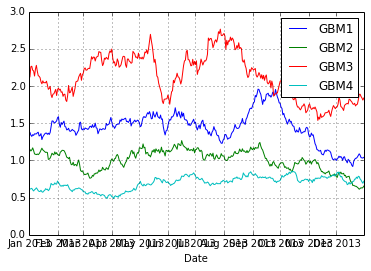

In [218]:
import datetime
first_jan_2013 = datetime.date(2013,1,1)
one_day = datetime.timedelta(days = 1)
plot_df = DataFrame(np.exp(np.cumsum(0.025*np.random.randn(365,4),axis=0) + 2*np.random.rand(1,4) - 1),columns=['GBM1','GBM2','GBM3','GBM4'])
plot_df['Date'] = plot_df.index.map(lambda t : one_day * t + first_jan_2013)
plot_df.set_index(['Date'], inplace=True)
ax = plot_df.plot() # Eeeeek

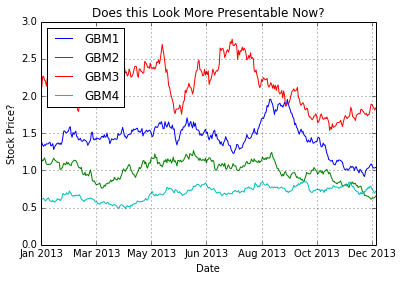

In [219]:
new_xticks = map(lambda t: t * 60 * one_day + first_jan_2013, range(7))
ax.set_xticks(new_xticks)
ax.set_title('Does this Look More Presentable Now?')
ax.set_ylabel('Stock Price?')
ax.legend(loc='upper left')
ax.figure

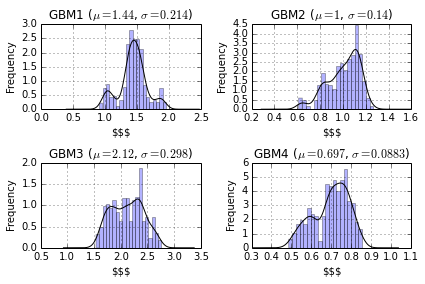

In [220]:
axes = plot_df.hist(bins=20, normed=True, alpha=0.3) # A "normalized" histogram, in lighter color
fig = axes[0,0].figure
for i in range(len(axes)):
    for j in range(len(axes[i])):        
        this_series = plot_df[axes[i][j].get_title()]        
        this_series.plot(kind='kde', ax=axes[i][j], color='k') # Kernel Density Estimate
        
        axes[i][j].set_title( axes[i][j].get_title() + ' ($\mu={0:.3g}$, $\sigma={1:.3g}$)'.format(this_series.mean(), this_series.std()))
        axes[i][j].set_xlabel('$$$')
        axes[i][j].set_ylabel('Frequency')
fig.tight_layout()

In [295]:
# To save figure, use: fig.savefig('filename', dpi=300, ...)

In [221]:
bar_df = pd.concat([
                   pd.DataFrame({'values' : np.random.randint(1,10,(1000)), 'type': 1}),
                   pd.DataFrame({'values' : np.random.randint(3,7,(400)), 'type': 2}),
                   pd.DataFrame({'values' : np.random.randint(6,12,(600)), 'type': 3})
                ])
bar_df['indiv'] = np.arange(len(bar_df))
bar_df.set_index(['indiv'], inplace=True)
bar_df.head()

,type,values
indiv,,
0,1,5
1,1,8
2,1,7
3,1,8
4,1,1


In [222]:
print bar_df.head()
print bar_df.tail()

       type  values
indiv              
0         1       5
1         1       8
2         1       7
3         1       8
4         1       1
       type  values
indiv              
1995      3      11
1996      3      11
1997      3      11
1998      3      10
1999      3      10


In [223]:
bar_df[['values']].groupby([bar_df['type'], bar_df['values']]).count()

values
type values        
1    1          116
     2          107
     3           96
     4          123
     5          117
     6           99
     7          115
     8          113
     9          114
2    3          107
     4           81
     5          101
     6          111
3    6          107
     7          109
     8           75
     9          103
     10          98
     11         108

In [224]:
bar_df[['values']].groupby([bar_df['type'], bar_df['values']])

In [225]:
bar_df[['values']].groupby([bar_df['type'], bar_df['values']]).count()

values
type values        
1    1          116
     2          107
     3           96
     4          123
     5          117
     6           99
     7          115
     8          113
     9          114
2    3          107
     4           81
     5          101
     6          111
3    6          107
     7          109
     8           75
     9          103
     10          98
     11         108

In [226]:
counts_by_type = bar_df[['values']].groupby([bar_df['type'], bar_df['values']]).count().unstack()
counts_by_type

values                                                 
values      1    2    3    4    5    6    7    8    9   10   11
type                                                           
1          116  107   96  123  117   99  115  113  114 NaN  NaN
2          NaN  NaN  107   81  101  111  NaN  NaN  NaN NaN  NaN
3          NaN  NaN  NaN  NaN  NaN  107  109   75  103  98  108

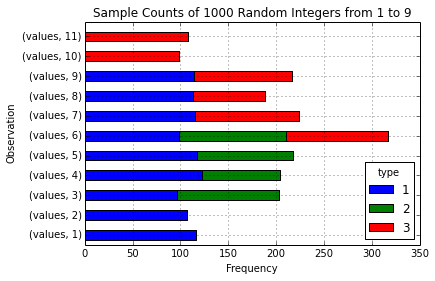

In [227]:
ax = counts_by_type.T.plot(kind='barh', stacked=True)
ax.set_title('Sample Counts of 1000 Random Integers from 1 to 9')
ax.set_ylabel('Observation')
ax.set_xlabel('Frequency')

In [228]:
counts_by_type.columns

MultiIndex
[(u'values', 1), (u'values', 2), (u'values', 3), (u'values', 4), (u'values', 5), (u'values', 6), (u'values', 7), (u'values', 8), (u'values', 9), (u'values', 10), (u'values', 11)]

In [229]:
counts_by_type.columns = [b for a,b in counts_by_type.columns]
counts_by_type

,1,2,3,4,5,6,7,8,9,10,11
type,,,,,,,,,,,
1,116,107,96,123,117,99,115,113,114,NaN,NaN
2,NaN,NaN,107,81,101,111,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,107,109,75,103,98,108


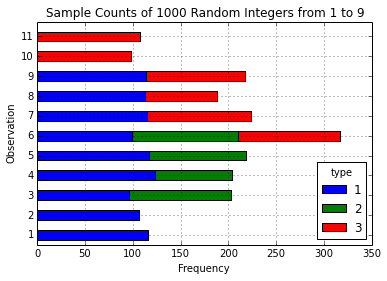

In [230]:
ax = counts_by_type.T.plot(kind='barh', stacked=True)
ax.set_title('Sample Counts of 1000 Random Integers from 1 to 9')
ax.set_ylabel('Observation')
ax.set_xlabel('Frequency')

# Additional Data Manipulation

### Binning

In [231]:
dfDifferences = pd.DataFrame({ 'log differences' : np.random.randn(100) })
dfDifferences.describe()

,log differences
count,100.000000
mean,-0.165958
std,0.879529
min,-1.935109
25%,-0.705058
50%,-0.280501
75%,0.413888
max,1.991845


In [232]:
categoriesDiffs = pd.cut(dfDifferences['log differences'], range(-1,5)) # The second parameter is a list of bin boundaries.
categoriesDiffs

Categorical: log differences
[(-1, 0], nan, (-1, 0], (0, 1], (-1, 0], (0, 1], (-1, 0], (-1, 0], (-1, 0], (-1, 0], (0, 1], (-1, 0], nan, (0, 1], nan, (0, 1], (0, 1], (-1, 0], (1, 2], (0, 1], (0, 1], (1, 2], (0, 1], (-1, 0], (-1, 0], (0, 1], (0, 1], nan, nan, nan, (0, 1], (1, 2], (-1, 0], (1, 2], (-1, 0], (-1, 0], (-1, 0], (-1, 0], (1, 2], (-1, 0], (0, 1], (0, 1], (-1, 0], (-1, 0], nan, (0, 1], (-1, 0], nan, (0, 1], (-1, 0], (0, 1], (-1, 0], (-1, 0], (-1, 0], (1, 2], (-1, 0], (-1, 0], (-1, 0], (-1, 0], (-1, 0], (0, 1], (1, 2], (0, 1], (-1, 0], (-1, 0], (-1, 0], (-1, 0], (-1, 0], (-1, 0], (-1, 0], nan, nan, (0, 1], (-1, 0], (-1, 0], nan, (0, 1], (-1, 0], nan, nan, (-1, 0], nan, (-1, 0], (0, 1], (-1, 0], (0, 1], (-1, 0], (0, 1], nan, (0, 1], (-1, 0], (0, 1], (-1, 0], nan, (-1, 0], (0, 1], nan, (1, 2], (0, 1], (-1, 0]]
Levels (5): Index(['(-1, 0]', '(0, 1]', '(1, 2]', '(2, 3]', '(3, 4]'], dtype=object)

In [233]:
categoriesDiffs.labels

array([ 0, -1,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0, -1,  1, -1,  1,  1,
        0,  2,  1,  1,  2,  1,  0,  0,  1,  1, -1, -1, -1,  1,  2,  0,  2,
        0,  0,  0,  0,  2,  0,  1,  1,  0,  0, -1,  1,  0, -1,  1,  0,  1,
        0,  0,  0,  2,  0,  0,  0,  0,  0,  1,  2,  1,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  1,  0,  0, -1,  1,  0, -1, -1,  0, -1,  0,  1,  0,
        1,  0,  1, -1,  1,  0,  1,  0, -1,  0,  1, -1,  2,  1,  0])

But sometimes you prefer to not specify bins and let the data speak for itself. The NaNs inidicate bin-less values.

In [234]:
# This creates (4) equal length bins based on the data, labels are... category labels
categoriesDiffs = pd.cut(dfDifferences['log differences'], 4, labels = ['--', '-', '+', '++'])
categoriesDiffs

Categorical: log differences
[-, --, -, +, -, +, -, -, -, -, +, -, --, +, --, +, +, -, ++, +, +, ++, +, -, -, +, +, --, --, --, +, ++, -, ++, -, -, -, -, ++, -, +, +, -, -, --, +, -, --, +, -, +, -, -, -, ++, -, -, -, -, -, +, ++, +, -, -, -, -, -, -, -, --, --, +, -, -, --, +, -, --, --, -, --, -, +, -, +, -, -, --, +, -, +, -, --, -, +, --, ++, +, -]
Levels (4): Index(['--', '-', '+', '++'], dtype=object)

In [235]:
dfDifferences['bin'] = categoriesDiffs.labels
dfDifferences.head()

,log differences,bin
0,-0.481662,1
1,-1.588404,0
2,-0.223808,1
3,0.226621,2
4,-0.424106,1


In [236]:
dfDifferences[['bin']].groupby('bin').count() # Just had to do this... Couldn't resist

,bin
bin,
0,17
1,48
2,27
3,8


In [237]:
# Here's a qualtile-based way of cutting
categoriesDiffs = pd.qcut(dfDifferences['log differences'], [0,0.25,0.5,0.75,1], labels = ['--', '-', '+', '++'])
categoriesDiffs

Categorical: log differences
[-, --, +, +, -, ++, +, -, +, -, +, -, --, +, --, +, +, -, ++, ++, ++, ++, ++, -, +, ++, ++, --, --, --, ++, ++, --, ++, --, -, -, -, ++, --, ++, ++, +, -, --, ++, +, --, +, --, ++, -, --, +, ++, -, --, -, -, -, ++, ++, +, +, +, -, -, -, --, +, --, --, ++, -, +, --, ++, -, --, --, -, --, +, +, -, ++, +, +, --, ++, --, ++, -, --, -, +, --, ++, +, +]
Levels (4): Index(['--', '-', '+', '++'], dtype=object)

In [238]:
dfDifferences['bin'] = categoriesDiffs.labels
dfDifferences[['bin']].groupby('bin').count() # By definition...

,bin
bin,
0,25
1,25
2,25
3,25


### Dummification (Categorical Variable to Dummy Columns)

We have categories, but to do stuff like regression, we prefer dummy columns.

In [239]:
dummy_cols = pd.get_dummies(dfDifferences['bin'])
dummy_cols.head()

,0,1,2,3
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [240]:
dfDifferencesProcessed = dfDifferences.join(dummy_cols)
dfDifferencesProcessed.head()

,log differences,bin,0,1,2,3
0,-0.481662,1,0,1,0,0
1,-1.588404,0,1,0,0,0
2,-0.223808,2,0,0,1,0
3,0.226621,2,0,0,1,0
4,-0.424106,1,0,1,0,0


### Resampling (Without Replacement; e.g.: Training Set - Validation Set)

In [241]:
dfData = pd.DataFrame({'X' : np.random.randn(1000) * np.random.exponential(1, 1000)})
dfData.head()

,X
0,0.504308
1,-0.078645
2,0.323660
3,-0.162164
4,0.060904


In [242]:
permutation = np.random.permutation(len(dfData))
dfData.take(permutation[:10])

,X
312,-0.115008
335,0.070387
622,-0.009156
129,-0.072704
964,0.081080
825,-0.221029
718,-0.168094
518,0.288700
266,0.372786
51,-0.022850


### Resampling (With Replacement; e.g.: Simulation)

In [243]:
samples = np.random.randint(0,len(dfData), 10)
dfData.take(samples)

,X
429,-1.021700
256,1.286756
894,0.679044
866,0.040743
807,-0.256280
833,0.209927
551,0.086602
322,0.603618
450,-0.614206
67,2.876681


# Panel Data (Tables Evolving Over Time)

In [244]:
some_stock_data = {}
for ticker in ['AAPL', 'FB', 'SPLS']: # Stuff I can see now: Why do I have "assorted rubber bands (gomitas surtidos)" from SPLS??
    some_stock_data[ticker] = pd.read_csv('S&P500\\S&P500_Data_%s.csv' % ticker, index_col=0, parse_dates=True)
stock_panel = pd.Panel(some_stock_data)
stock_panel

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 3552 (major_axis) x 6 (minor_axis)
Items axis: AAPL to SPLS
Major_axis axis: 2000-01-03 00:00:00 to 2014-02-14 00:00:00
Minor_axis axis: Open to Adj Close

Indexing Panels:

- Items (Named by dictionary keys)
- DataFrame (in dictionary values) index
- DataFrame (in dictionary values) columns

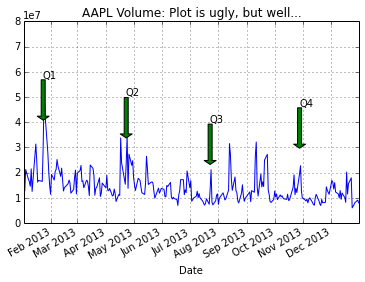

In [245]:
ax = stock_panel.ix['AAPL', datetime.date(2013,1,1):datetime.date(2013,12,31),'Volume'].plot()

AAPL_earnings_releases_2013 = { datetime.date(2013, 1, 23) : 'Q1', datetime.date(2013, 4, 23) : 'Q2',
                               datetime.date(2013, 7, 23) : 'Q3', datetime.date(2013, 10, 28) : 'Q4' }
ax.set_ylim([0, 8e7])
for date in AAPL_earnings_releases_2013.keys():
    ax.annotate(AAPL_earnings_releases_2013[date], xy=(date, stock_panel.ix['AAPL',date,'Volume'] + 1e7),
    xytext=(date, stock_panel.ix['AAPL',date,'Volume'] + 3e7),
    arrowprops=dict(facecolor='green'),
    horizontalalignment='left', verticalalignment='top')
ax.set_title('AAPL Volume: Plot is ugly, but well...')

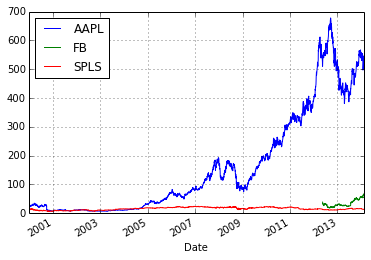

In [246]:
# But maybe one might like to index in this way...
stock_panel2 = stock_panel.swapaxes('items', 'minor')
stock_panel2.ix['Adj Close'].plot()

In [247]:
# If one does not like panels...
stocks_stacked = stock_panel.to_frame()
stocks_stacked.head()

AAPL            FB         SPLS
Date       minor                                         
2012-05-18 Open         533.96  4.205000e+01        13.29
           High         543.41  4.500000e+01        13.35
           Low          522.18  3.800000e+01        13.02
           Close        530.38  3.823000e+01        13.07
           Volume  26153300.00  5.735764e+08  12011700.00

In [248]:
# Or...
stocks_stacked = stock_panel.swapaxes('items', 'minor').to_frame()
stocks_stacked.columns.name = 'fields'
stocks_stacked.tail() # Because FB won't be in .head()

fields              Open    High     Low   Close    Volume  Adj Close
Date       minor                                                     
2014-02-13 FB      64.18   67.33   64.05   67.33  61911700      67.33
           SPLS    13.18   13.20   13.04   13.07   6571800      13.07
2014-02-14 AAPL   542.47  545.98  541.21  543.99   9747300     543.99
           FB      67.50   67.58   66.72   67.09  36694900      67.09
           SPLS    13.02   13.11   12.95   13.03   7350800      13.03

# Type Coercion

So one readily remediable issue with Pandas is pulling information out of it. Sometimes data coming out of it in array form has the data type object even though the whole array is of ints and floats.

In [249]:
df.values

array([[0.1, 'Red', 1L, 'a'],
       [1.85, 'Red', 11L, 1.85],
       [0.2, 'Green', 6L, None],
       [1.85, 'Green', 8L, 1.85],
       [nan, 'Red', -1L, 'a']], dtype=object)

In [250]:
df.values[:,0] # Hmmm.... Maybe it's the nan

array([0.1, 1.85, 0.2, 1.85, nan], dtype=object)

In [251]:
df.values[:,1] # Hmmm.... Why are these not strings

array(['Red', 'Red', 'Green', 'Green', 'Red'], dtype=object)

In [252]:
df.values[:,2] # Wait... This can't be right

array([1L, 11L, 6L, 8L, -1L], dtype=object)

So what you do is...

In [253]:
df.values[:,2].astype(int32)

array([ 1, 11,  6,  8, -1])

In [254]:
df.values[:,2].astype(float64)

array([  1.,  11.,   6.,   8.,  -1.])

In [255]:
df.values[:,[0,2]].astype(float64)

array([[  0.1 ,   1.  ],
       [  1.85,  11.  ],
       [  0.2 ,   6.  ],
       [  1.85,   8.  ],
       [   nan,  -1.  ]])

In [256]:
type(df.values[:,[0,2]].astype(float64)[4,0])

numpy.float64

In [332]:
df.values[:,[0,2]].astype(int64) # NaN's are not castable to integers...

ValueError: cannot convert float NaN to integer

When you need this...

In [257]:
# Remember this guy?
dfStack

group  myIndex           
Red    one      float_col     0.1
                int_col         1
                str_col         a
       two      float_col    1.85
                int_col        11
                str_col      1.85
Green  three    float_col     0.2
                int_col         6
       four     float_col    1.85
                int_col         8
                str_col      1.85
Red    42       int_col        -1
                str_col         a
dtype: object

In [258]:
dfStack.unstack()['float_col'] # Is now an object series

group  myIndex
Green  four       1.85
       three       0.2
Red    42          NaN
       one         0.1
       two        1.85
Name: float_col, dtype: object

In [259]:
# Let's see that happen in slow motion...

In [260]:
df1['float_col']

group  myIndex
Red    one        0.10
       two        1.85
Green  three      0.20
       four       1.85
Red    42          NaN
Name: float_col, dtype: float64

In [261]:
df1['int_col']

group  myIndex
Red    one         1
       two        11
Green  three       6
       four        8
Red    42         -1
Name: int_col, dtype: int64

In [262]:
df1.stack()

group  myIndex           
Red    one      float_col     0.1
                int_col         1
                str_col         a
       two      float_col    1.85
                int_col        11
                str_col      1.85
Green  three    float_col     0.2
                int_col         6
       four     float_col    1.85
                int_col         8
                str_col      1.85
Red    42       int_col        -1
                str_col         a
dtype: object

In [263]:
df1.stack().unstack()['float_col'] # Yucks! See where that happened?

group  myIndex
Green  four       1.85
       three       0.2
Red    42          NaN
       one         0.1
       two        1.85
Name: float_col, dtype: object

Use type coercion when you can reason about the actual types.

# More Infomation

Great book on Pandas: <a href=http://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793>Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython Paperback</a> by Wes McKinney (Developer of Pandas)

<table border=0><tr>
<td width=200>
<a href=http://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793><img src="http://akamaicovers.oreilly.com/images/0636920023784/lrg.jpg"></a>
</td>
<td>
                                                    <p>
                                                        <i>Python for Data Analysis</i> is concerned with the nuts and bolts of manipulating, processing, cleaning, and crunching data in Python. It is also a practical, modern introduction to scientific computing in Python, tailored for data-intensive applications. This is a book about the parts of the Python language and libraries you’ll need to effectively solve a broad set of data analysis problems. This book is not an exposition on analytical methods using Python as the implementation language.
</p>
                                                    <p>Written by Wes McKinney, the main author of the pandas library, this hands-on book is packed with practical cases studies. It’s ideal for analysts new to Python and for Python programmers new to scientific computing.
</p>
                                                    <ul>
                                                        <li>Use the IPython interactive shell as your primary development environment
</li>
                                                        <li>Learn basic and advanced NumPy (Numerical Python) features
</li>
                                                        <li>Get started with data analysis tools in the pandas library
</li>
                                                        <li>Use high-performance tools to load, clean, transform, merge, and reshape data
</li>
                                                        <li>Create scatter plots and static or interactive visualizations with matplotlib
</li>
                                                        <li>Apply the pandas groupby facility to slice, dice, and summarize datasets
</li>
                                                        <li>Measure data by points in time, whether it’s specific instances, fixed periods, or intervals
</li>
                                                        <li>Learn how to solve problems in web analytics, social sciences, finance, and economics, through detailed examples
</li>
                                                    </ul>
</td></tr></table>

Pandas online documentation: http://pandas.pydata.org/pandas-docs/stable/

Here's a great database on which to apply things: http://ashleyw.co.uk/project/food-nutrient-database